In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
names = pandas.read_csv("IMDb names.csv")
names = names.filter(['imdb_name_id','name','birth_name','height','bio','birth_details','date_of_birth','place_of_birth','death_details','date_of_death','place_of_death','reason_of_death','spouses_string','spouses','divorces','spouses_with_children','children'], axis=1)
names

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0247361,Harry Earles,Kurt Schneider,99.0,Harry/Kurt (stage name/real name) came over to...,"April 3, 1902 inÂ Stolpen, Germany",4/3/1902,"Stolpen, Germany","May 4, 1985 inÂ Sarasota, Florida, USA Â (undi...",5/4/1985,"Sarasota, Florida, USA Â",undisclosed,NaN,0.0,0.0,0.0,0.0
1,nm0692853,Mikey Post,Mikey Post,97.0,"Mikey Post was born on April 29, 1982 in Colum...","April 29, 1982 inÂ Columbus, Ohio, USA",4/29/1982,"Columbus, Ohio, USA",17-Feb-18,2/17/2018,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,nm0808508,Ian Michael Smith,Ian Michael Smith,94.0,"Ian Michael Smith was born on May 5, 1987 in I...","May 5, 1987 inÂ Illinois, USA",5/5/1987,"Illinois, USA",NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,nm0683739,Gabriel Pimentel,Gabriel Pimentel,86.0,"Gabriel Pimentel was born on July 28, 1979 in ...","July 28, 1979 inÂ San Fernando Valley, Califor...",7/28/1979,"San Fernando Valley, California, USA",NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,nm0911067,Weng Weng,Ernesto de la Cruz,84.0,The 1981 Manila International Film Festival wa...,"September 7, 1957 inÂ Pasay City, Philippines",9/7/1957,"Pasay City, Philippines","August 29, 1992 inÂ Pasay City, Philippines Â ...",8/29/1992,"Pasay City, Philippines Â",heart attack,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297699,nm5047752,Steve Laurence,Steve Laurence,NaN,"Steve Laurence is a writer and producer, known...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
297700,nm5474275,Sunay Terzioglu,Sunay Terzioglu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
297701,nm5909653,Sung Lim Ju,Sung Lim Ju,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
297702,nm5993616,Coulee Nazha,GÃ¼lnezer Bextiyar,NaN,"Coulee Nazha was born on May 2, 1992 in Urumqi...","May 2, 1992 inÂ Urumqi, Xinjiang, China",5/2/1992,"Urumqi, Xinjiang, China",NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


Names contiene 297,704 miembros del cast con su información personal. Las variables que se tienen son: id del individuo, nombre artístico, nombre de nacimiento, estatura, biografía, fecha y lugar de nacimiento, fecha de nacimiento, lugar de nacimiento, detalles de muerte si ya falleció, razones de muerte, fecha de matrimonio con sus esposas, número de esposas, divorcios, esposas con hijos y número de hijos.

Ideas: como muere la mayoría de los miembros de cast, que tal les va en sus matrimonios. 

### Descripción de la base de datos:
Tamaño de la base: $(297704, 17)$

Variables de la base:
* imdb_name_id, `string`: clave de cada miembro del cast.
* name, `float`: nombre artístico.
* birth_name, `float`: nombre de nacimiento.
* height $\in (20, 320)$, `int`: estatura en cm. 
* bio, `string`: biografía.
* birth_details, `string`: fecha y lugar de nacimiento.
* date_of_birth, `string`: fecha de nacimiento.
* place_of_birth, `string`: lugar de nacimiento.
* death_details, `string`: fecha y lugar de fallecimiento.
* date_of_death, `string`: fecha de fallecimiento.
* place_of_death, `string`: lugar de fallecimiento.
* reason_of_death, `string`: razon de muerte. 
* spouses_string, `string`: nombre de pareja y fechas de inicio y fin de matrimonio.
* spouses $\in (0, 12)$, `int`: numero de esposas.
* divorces $\in (0, 12)$, `int`: numero de divorcios.
* spouses_with_children $\in (0, 6)$, `int`: numero de esposas con hijos.
* children $\in (0, 16)$, `int`: numero de hijos. 

In [34]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297704 entries, 0 to 297703
Data columns (total 16 columns):
imdb_name_id       297704 non-null object
name               297704 non-null object
birth_name         297704 non-null object
height             44680 non-null float64
bio                204697 non-null object
birth_details      110606 non-null object
date_of_birth      110606 non-null object
place_of_birth     103986 non-null object
death_details      39929 non-null object
date_of_death      39929 non-null object
place_of_death     37034 non-null object
reason_of_death    22690 non-null object
spouses_string     45347 non-null object
spouses            297698 non-null float64
divorces           297698 non-null float64
children           297698 non-null float64
dtypes: float64(4), object(12)
memory usage: 36.3+ MB


### Analisis Exploratorio de Datos

**Datos faltantes**

In [5]:
names.isnull().sum(axis = 0)

imdb_name_id         0
name                 0
birth_name           0
height          253024
bio              93007
                 ...  
Unnamed: 136    297704
Unnamed: 137    297703
Unnamed: 138    297703
Unnamed: 139    297703
Unnamed: 140    297703
Length: 141, dtype: int64

Se puede observar las columnas con valores faltantes, es normal que falte información en las columnas de detalle de muerte en caso de que los actores aun no fallezcan, también es normal que falte información sobre lazos matrimoniales ya que hay muchos que nunca se casaron. Los datos faltantes que se deben a que no se tiene algún registro son los de estatura, biografía y detalles de nacimiento, ya que estos eventos sí ocurrieron. 

Es necesario analizar si hace falta hacer imputación de estos datos en caso de ser muy necesarios para la minería de datos, o bien, dejar las columnas como están. 

**Estadísticos de resumen**

In [41]:
names.describe()

,height,spouses,divorces,spouses_with_children,children
count,44680.000000,297698.000000,297698.000000,297698.000000,297698.000000
mean,174.873366,0.208664,0.071710,0.104858,0.196421
std,10.854484,0.570174,0.348486,0.349755,0.721227
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,0.000000,0.000000,0.000000,0.000000
50%,175.000000,0.000000,0.000000,0.000000,0.000000
75%,183.000000,0.000000,0.000000,0.000000,0.000000
max,320.000000,12.000000,12.000000,6.000000,16.000000


Me llama la atención que para las últimas 4 columnas se tienen valores de 0 en los cuartiles 25, 50 y 75, se harán histogramas para identificar si esto es un error en los datos o si realmente están muy concentrados en valores altos. 

La función describe() nos facilita la tarea de calcular los estadísticos de resumen de cada variable y lo hace para cada columna del dataframe. Describe() nos devuelve:
* Count = número de elementos
* Mean = media aritmética
* Std = desviación estándar
* Min = valor mínimo
* 25% = primer cuartil
* 50% = mediana
* 75% = tercer cuartil 
* Max = valor máximo
Por sí sólos, estos valores no nos dicen mucho. 

**Histogramas**

"Una imagen dice más que mil palabras", por lo que obtendremos histogramas y *boxplots* de cada variable, para indentificar cómo se concentran los datos, presencia de valores atípicos y simetría en las distribuciones. 

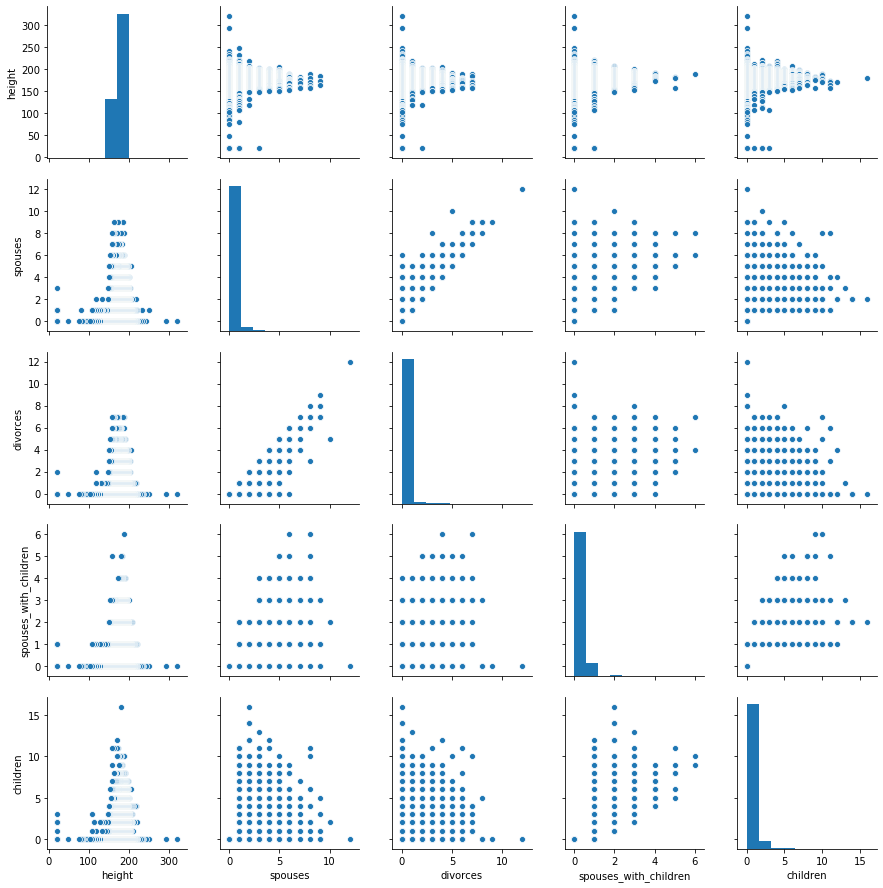

In [42]:
sns.pairplot(names, vars=['height','spouses','divorces','spouses_with_children','children'])  
plt.show()

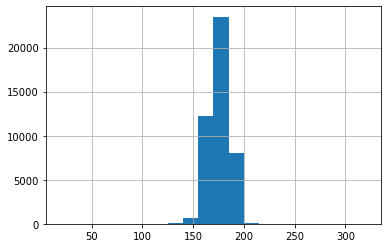

In [8]:
names['height'].hist(bins=20)

**Correlaciones**

In [43]:
corr = names.corr()
corr

,height,spouses,divorces,spouses_with_children,children
height,1.000000,0.002552,-0.017471,0.044930,0.066216
spouses,0.002552,1.000000,0.771226,0.741949,0.641392
divorces,-0.017471,0.771226,1.000000,0.537292,0.420272
spouses_with_children,0.044930,0.741949,0.537292,1.000000,0.882625
children,0.066216,0.641392,0.420272,0.882625,1.000000


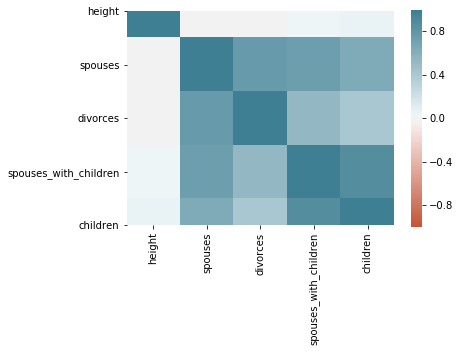

In [44]:
# Heatmap de correlaciones usando seaborn
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

**Variables categoricas**

In [11]:
print(names.nunique())

imdb_name_id    297704
name            291010
birth_name      292420
height             115
bio             204626
                 ...  
Unnamed: 136         0
Unnamed: 137         1
Unnamed: 138         1
Unnamed: 139         1
Unnamed: 140         1
Length: 141, dtype: int64


In [12]:
pandas.value_counts(names.reason_of_death)

undisclosed                       5671
heart attack                      2464
cancer                            2250
natural causes                    1034
heart failure                      671
                                  ... 
killed in combat near Demyansk       1
brain and lung cancer                1
accidental shooting                  1
bowel and lung cancer                1
respiratory heart failure            1
Name: reason_of_death, Length: 1974, dtype: int64

In [13]:
frequency_death=pandas.crosstab(index=names['reason_of_death'], columns='count')
frequency_death["percent"]=frequency_death['count']/numpy.sum(frequency_death['count'])

In [14]:
frequency_death = frequency_death.sort_values(by=['count'], ascending=False)
frequency_death.head(11)

col_0,count,percent
reason_of_death,,
undisclosed,5671,0.249934
heart attack,2464,0.108594
cancer,2250,0.099163
natural causes,1034,0.045571
heart failure,671,0.029572
lung cancer,615,0.027104
pneumonia,553,0.024372
stroke,416,0.018334
suicide,404,0.017805


Text(0.5, 1.0, 'Most common reasons of death')

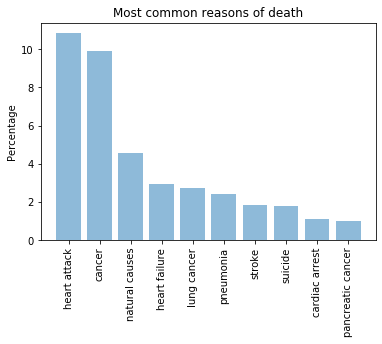

In [15]:
objects = ('heart attack','cancer','natural causes','heart failure','lung cancer','pneumonia','stroke','suicide','cardiac arrest','pancreatic cancer')
y_pos = numpy.arange(len(objects))
performance = [10.85,9.91,4.56,2.95,2.71,2.43,1.83,1.78,1.1,1.0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Percentage')
plt.title('Most common reasons of death')

In [16]:
titles = pandas.read_csv("IMDb title_principals.csv")
titles

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...
835508,tt9914942,6,nm3678448,writer,NaN,NaN
835509,tt9914942,7,nm9361716,writer,novel,NaN
835510,tt9914942,8,nm2262072,composer,NaN,NaN
835511,tt9914942,9,nm1966322,cinematographer,NaN,NaN


In [17]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835513 entries, 0 to 835512
Data columns (total 6 columns):
imdb_title_id    835513 non-null object
ordering         835513 non-null int64
imdb_name_id     835513 non-null object
category         835513 non-null object
job              212731 non-null object
characters       340836 non-null object
dtypes: int64(1), object(5)
memory usage: 38.2+ MB


Titles contiene 835, 513 títulos en los que aparecen miembros de cast de la base names, esto incluye: id de película, orden de importancia de la película, name id, papel en la película, job, personajes. 

### Descripción de la base de datos:
Tamaño de la base: $(835513, 6)$

Variables de la base:
* imdb_title_id, `string`: clave de la pelicula.
* ordering $\in (1, 10)$, `int`: orden de importancia de la pelicula.
* imdb_name_id, `string`: clave de cada miembro del cast.
* category, `string`: categoria del miembro del cast.
* job, `string`: trabajo desarrollado.
* characters, `string`: personajes interpretados en la pelicula. 

In [18]:
titles.describe()

,ordering
count,835513.000000
mean,5.398360
std,2.837061
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000
